# Spotify Recommend Engine

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import seaborn as sns

from sklearn.model_selection import train_test_split

plt.style.use('seaborn-pastel')

In [2]:
# Checking available styles of plt: 
#plt.style.available

## 1. EDA & Data Preparation

In [3]:
artists = pd.read_csv("data/artists.csv")
print("Artists shape:", artists.shape)

tracks = pd.read_csv("data/tracks.csv")
print("Tracks shape:", tracks.shape)

Artists shape: (1162095, 5)
Tracks shape: (586672, 20)


In [4]:
dict_artists = pd.read_json("data/dict_artists.json", orient="index")
print("Dict Artists shape:", dict_artists.shape)

Dict Artists shape: (573856, 20)


In [5]:
display(dict_artists.sample(5))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0jrXwJt2YkqkJet06TRAJB,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
5IboVCsWQQTihz7K6Pelc3,6x6xIaIaozhgJafVwU6euy,58xnndR9kS006WQWpYCInG,3zgP1Nz3ess7Wzjd8ZzrtX,0u8CV5hMxYiKctbYRZy1aW,68s65gUVfIeVskck5NvxCJ,37QbBLDqQ9K6jIjDvf7vIh,1vo1URSTODJ3jirm410pd4,5R6Apw6QgECTJDP8RqWm3n,5zm29OYey8QXV0BJnwGt8a,4svvMm4TQnkphZJfhLCzzv,0WiZi3Q419nMpAQEqfBCbk,2ChB7Uh8CARtLA3OCsijxT,1pDF5UltcypyatITA3Pduo,2UPhqtykrFw7G9is0YH3gk,3MVZmcDNyoI81ZmAu0YiF7,6umn0ODoYa5UsGpswA99gx,5a2WF7juQ5oilpZCqikRtP,2pVurQy6iuWWx707gilSdX,2OrTfOi3k8VMFLuvC527bB,1H4ZvA2yyK7wCmbvEUWvPn
5UF4liigxSi4UKaHuIpb99,6N3jJE8sGo46WSLbEXcJ4B,3Yiqhz8apvTO9FmQCEEK2X,4lYG2NYEOGz5MwYw0sJBKe,23FmcsZ6NQlND3aqF8qu4c,7pbyAm76IQ6j6iyMbOWWmU,5NHZH0B0awWMcrftRTuH4p,1kagQdqmPIceVbOCBFvfNm,7oWPEUR84IgNAQj4Hqbtoz,1bXmYtwSLXkEjhdvshMbu7,3kKT5OBvk4J3EFiOSzCwmv,0OPksjELFXCfRsWvLKaJpz,0D1ZWJfzKn4gw0E7guWmMJ,2kQMvTU4sn9F6DZImbDUFd,36PGTb4lgZfU5UI9ISyyXU,68OifX49gFfYK7pS4FAFgZ,6p8n7kGEoqDVnTKeeCAS6K,6yYfndbYLrsmIcsOm1TwyN,2ms6yDuWUtmTkHjEwdyx1a,None,None
6ZilC2YkKUku9HKWD52LCq,5TSt5HRl7TUw6AgP2xJMY0,5XEppb8HuoomWfcErZ6ucd,2mNOzfzBzLaaseE5LsE8le,4h5FuHYkwsDdbviKscggQW,03gehYejWNbfsPlgu68XJe,4OBvFbaTtCJ0EzQBZhk8qD,1zT1q4AM6BRDhFtyCYUTQm,5mgx3BAtdkaX36UxySdV8I,0k67v8PBRiRO0QkNWyrKv3,0o1rM1JHq1JGK8lNm9MAyW,32jKZEjsXdWXJBoRpzvMEi,3wqA3GNANQzE5J7WJXSkzK,4910CfnqDbQuDlBgiFYZ2c,7IazBtQIXAoEUyhWwodylM,6dKcC2ygvq2659RmKAglvI,49t4cxFugpDaAHJWSdfzMy,4QZ7wUJM3IAqMjHaeQ2sex,4vWJuWzmJIkR75Z5BjlQ5D,0pTHXjX1EdEndhP8R1RnZY,1b6oDxsJx3WmckZCWzYaAu
019cJS6zQ89ruSKMkTEcPU,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


This json file contains useless features for our future recommender system.

In [6]:
del dict_artists

**Observations:**
- This data is at an *artist level*;
- Apparently, there are no missing values in the dataset - however, the variable ```genres``` is filled mainly with empty lists;
- Around 74% of the artists don't have genres associated;
- Popularity ranges from 0 to 100;
- Popularity and followers seem to exhibit an exponential relationship. 

In [7]:
display(artists.sample(5))

,id,followers,genres,name,popularity
862747,3AlkkON7qTVrRB34yFYHHB,70.0,[],STC,5
105785,06PAmgIjWsh7qNnmikUYl0,5619.0,[],Stard Ova,56
429796,1RbdFNEOvqdKtezHyR9fZH,336.0,[],Blinding,9
809845,0ouCv1Wy1EoUmtrh5V2lvc,45.0,[],Mechanical Musical Instruments,2
44203,0GZZdwtaE7adVp5te5DpzW,4.0,[],Codename-X,0


In [8]:
artists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1162095 entries, 0 to 1162094
Data columns (total 5 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   id          1162095 non-null  object 
 1   followers   1162084 non-null  float64
 2   genres      1162095 non-null  object 
 3   name        1162095 non-null  object 
 4   popularity  1162095 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 44.3+ MB


In [9]:
artists.genres.value_counts(normalize=True)

[]                                                                         7.370310e-01
['background piano']                                                       2.641781e-04
['calming instrumental']                                                   2.202918e-04
['background music']                                                       2.125472e-04
['russelater']                                                             1.944764e-04
                                                                               ...     
['rap regio', 'urbano espanol']                                            8.605148e-07
['brazilian heavy metal', 'brazilian thrash metal', 'metal paranaense']    8.605148e-07
['british experimental', 'chip hop', 'outer hip hop']                      8.605148e-07
['funk metal', 'glam metal', 'hard rock', 'sleaze rock']                   8.605148e-07
['j-poprock', 'japanese indie folk']                                       8.605148e-07
Name: genres, Length: 49155, dty

In [10]:
artists.describe()

,followers,popularity
count,1.162084e+06,1.162095e+06
mean,1.022070e+04,8.795961e+00
std,2.543995e+05,1.355777e+01
min,0.000000e+00,0.000000e+00
25%,1.000000e+01,0.000000e+00
50%,5.700000e+01,2.000000e+00
75%,4.170000e+02,1.300000e+01
max,7.890023e+07,1.000000e+02


In [11]:
artists.describe(include='object')

,id,genres,name
count,1162095,1162095,1162095
unique,1162095,49155,1134430
top,7MPgYFvoeqlnQ8S50tMTUl,[],Ace
freq,1,856500,13


In [12]:
artists.pivot_table(index='name', aggfunc='size')

name
!                                                  1
!!!                                                1
!A-Ace                                             1
!ATTENTION!                                        1
!Action Pact! with The Neurotics' Steve Drewett    1
                                                  ..
ＴＯＫＩＯ２３                                            1
ＹｕＮａ                                               1
ｄｅｔｒｏｉｔ７                                           1
ｌｏｎｇ ｂｏｙ                                           1
･ ･－･ ･－ ･･･ ･ －･･                                 1
Length: 1134430, dtype: int64

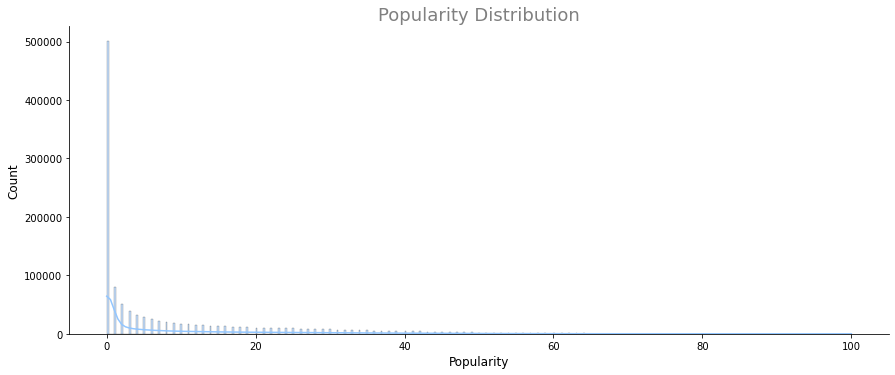

In [13]:
sns.displot(data=artists, x='popularity', kde=True, height=5, aspect=2.5)

plt.title('Popularity Distribution', fontsize=18, color='Gray')
plt.xlabel('Popularity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

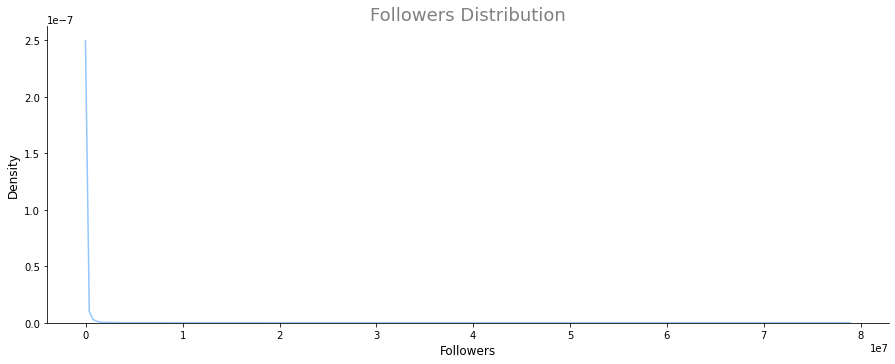

In [14]:
sns.displot(data=artists, x='followers', kind='kde', height=5, aspect=2.5)

plt.title('Followers Distribution', fontsize=18, color='Gray')
plt.xlabel('Followers', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

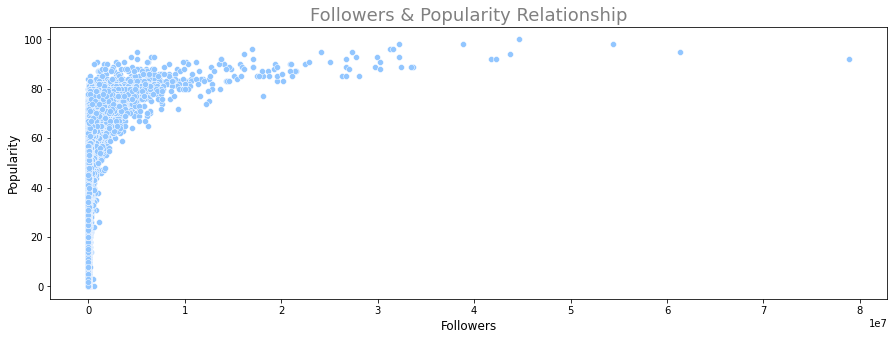

In [15]:
plt.rcParams['figure.figsize'] = (15,5)

sns.scatterplot(data=artists, x='followers', y='popularity')

plt.title('Followers & Popularity Relationship', fontsize=18, color='Gray')
plt.xlabel('Followers', fontsize=12)
plt.ylabel('Popularity', fontsize=12)
plt.show()

In [16]:
print('There are', len(artists[artists.followers == 0]), 'artists with 0 followers.')

There are 70924 artists with 0 followers.


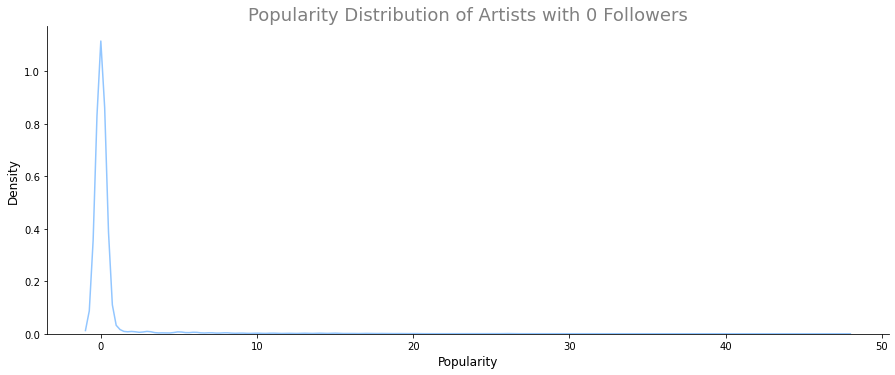

In [17]:
sns.displot(data=artists[artists.followers == 0], x='popularity', kind='kde', height=5, aspect=2.5)

plt.title('Popularity Distribution of Artists with 0 Followers', fontsize=18, color='Gray')
plt.xlabel('Popularity', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

In [18]:
artists[['followers', 'popularity']].corr()

,followers,popularity
followers,1.000000,0.171101
popularity,0.171101,1.000000


**Observations:**
- This data is at a *song level*;
- Apparently, there are no missing values in the dataset;

In [19]:
display(tracks.sample(5))

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
193707,0N593jp7LNocPCsWq5sTN1,Hi-Fidelity,32,166000,0,"['The Kids From ""Fame""']",['7Beta2R6dsbwzDa75TFlaU'],1982,0.645,0.614,0,-12.154,1,0.0441,0.31800,0.000000,0.3540,0.786,132.797,4
300240,2sPUMVRLMSHWdqJHzmZaLC,Lithium,39,257053,0,['Nirvana'],['6olE6TJLqED3rqDCT0FyPh'],1991-09-26,0.678,0.656,7,-6.410,1,0.0381,0.00174,0.000000,0.0631,0.485,123.207,4
74624,13lZDbwonGhOflQLQIfdtZ,We're Going to Be Friends,67,142227,0,['The White Stripes'],['4F84IBURUo98rz4r61KF70'],2001-07-03,0.534,0.459,7,-5.499,1,0.0277,0.69000,0.000000,0.0771,0.387,97.399,4
56649,0QVgZCAnasHo3TevIz7XLW,Girls Just Want to Have Fun,55,234600,0,['Cyndi Lauper'],['2BTZIqw0ntH9MvilQ3ewNY'],1983,0.704,0.721,6,-7.346,1,0.0369,0.37800,0.000113,0.3730,0.769,120.543,4
380405,5cPoCPV5O1wlKlqYDyMcax,Positif,52,232751,0,"['Matt Houston', 'P-Square']","['1ELgiI6P1y4zEkVElVjCbC', '42IUN9kTPdUdI1kre6...",2012-08-13,0.748,0.867,11,-5.051,0,0.1350,0.28700,0.000000,0.0868,0.798,108.105,4


In [20]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

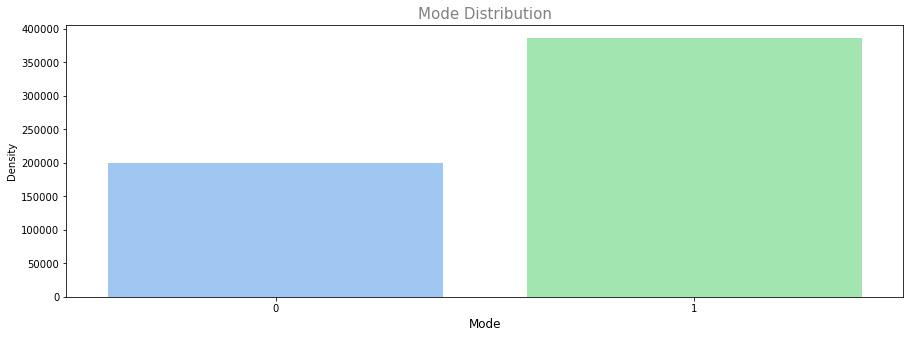

In [21]:
sns.countplot(data=tracks, x='mode')

plt.title('Mode Distribution', fontsize=15, color='Gray')
plt.xlabel('Mode', fontsize=12)
plt.ylabel('Density', fontsize=10)
plt.show()

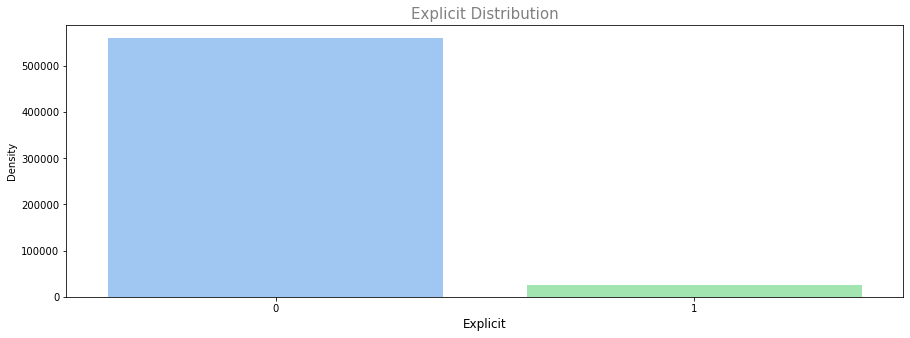

In [22]:
sns.countplot(data=tracks, x='explicit')

plt.title('Explicit Distribution', fontsize=15, color='Gray')
plt.xlabel('Explicit', fontsize=12)
plt.ylabel('Density', fontsize=10)
plt.show()

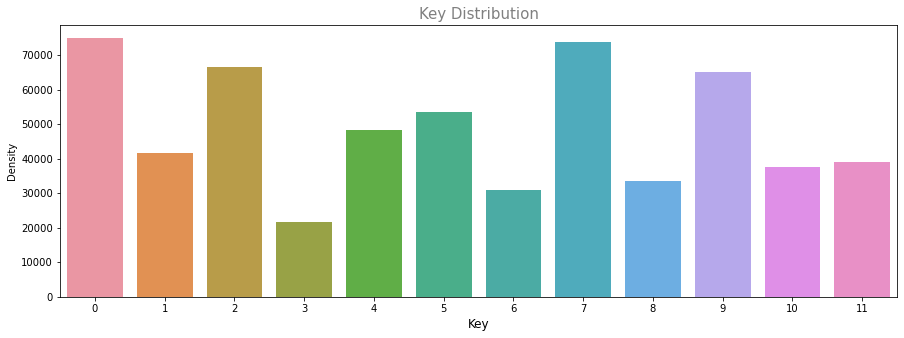

In [23]:
sns.countplot(data=tracks, x='key')

plt.title('Key Distribution', fontsize=15, color='Gray')
plt.xlabel('Key', fontsize=12)
plt.ylabel('Density', fontsize=10)
plt.show()

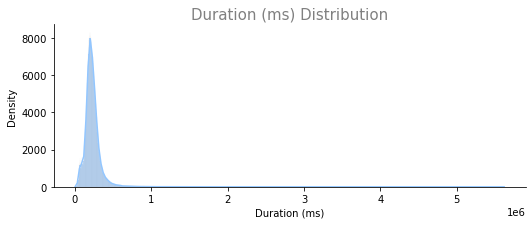

In [24]:
sns.displot(data=tracks, x='duration_ms', kde=True, height=3, aspect=2.5)

plt.title('Duration (ms) Distribution', fontsize=15, color='Gray')
plt.xlabel('Duration (ms)', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.show()

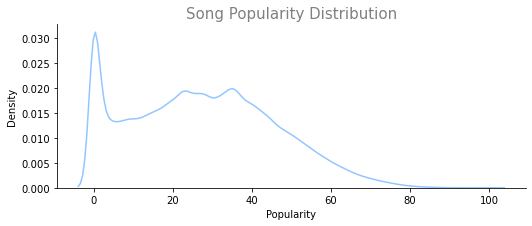

In [25]:
sns.displot(data=tracks, x='popularity', kind='kde', height=3, aspect=2.5)

plt.title('Song Popularity Distribution', fontsize=15, color='Gray')
plt.xlabel('Popularity', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.show()

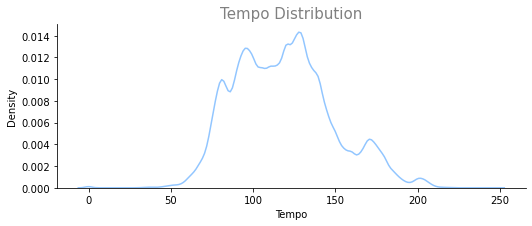

In [26]:
sns.displot(data=tracks, x='tempo', kind='kde', height=3, aspect=2.5)

plt.title('Tempo Distribution', fontsize=15, color='Gray')
plt.xlabel('Tempo', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.show()

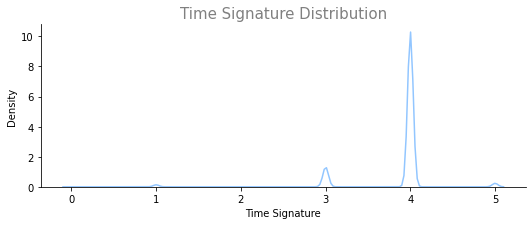

In [27]:
sns.displot(data=tracks, x='time_signature', kind='kde', height=3, aspect=2.5)

plt.title('Time Signature Distribution', fontsize=15, color='Gray')
plt.xlabel('Time Signature', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.show()

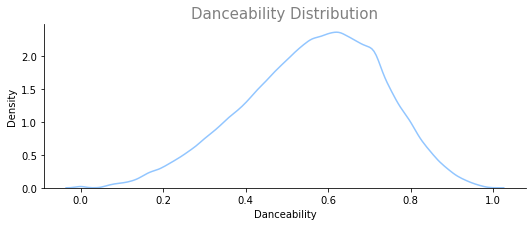

In [28]:
sns.displot(data=tracks, x='danceability', kind='kde', height=3, aspect=2.5)

plt.title('Danceability Distribution', fontsize=15, color='Gray')
plt.xlabel('Danceability', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.show()

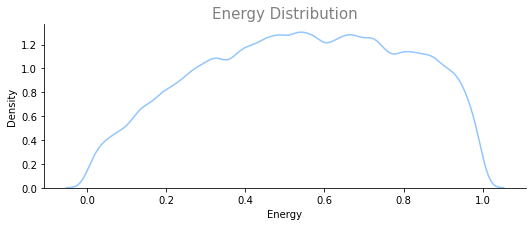

In [29]:
sns.displot(data=tracks, x='energy', kind='kde', height=3, aspect=2.5)

plt.title('Energy Distribution', fontsize=15, color='Gray')
plt.xlabel('Energy', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.show()

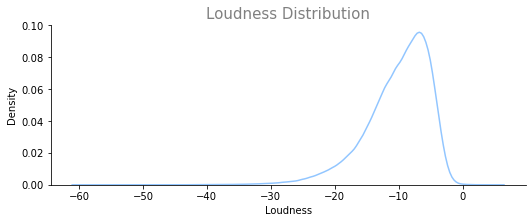

In [30]:
sns.displot(data=tracks, x='loudness', kind='kde', height=3, aspect=2.5)

plt.title('Loudness Distribution', fontsize=15, color='Gray')
plt.xlabel('Loudness', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.show()

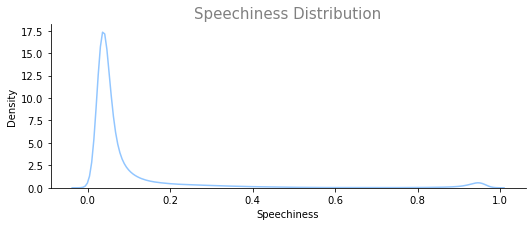

In [31]:
sns.displot(data=tracks, x='speechiness', kind='kde', height=3, aspect=2.5)

plt.title('Speechiness Distribution', fontsize=15, color='Gray')
plt.xlabel('Speechiness', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.show()

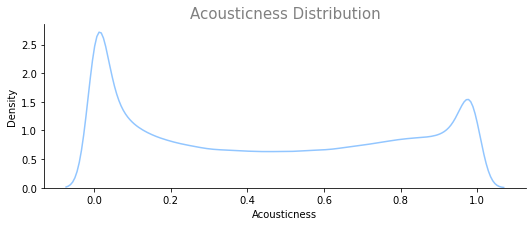

In [32]:
sns.displot(data=tracks, x='acousticness', kind='kde', height=3, aspect=2.5)

plt.title('Acousticness Distribution', fontsize=15, color='Gray')
plt.xlabel('Acousticness', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.show()

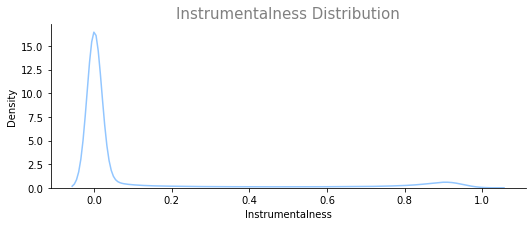

In [33]:
sns.displot(data=tracks, x='instrumentalness', kind='kde', height=3, aspect=2.5)

plt.title('Instrumentalness Distribution', fontsize=15, color='Gray')
plt.xlabel('Instrumentalness', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.show()

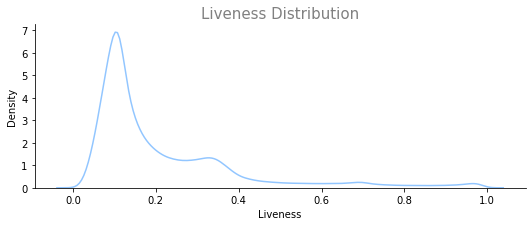

In [34]:
sns.displot(data=tracks, x='liveness', kind='kde', height=3, aspect=2.5)

plt.title('Liveness Distribution', fontsize=15, color='Gray')
plt.xlabel('Liveness', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.show()

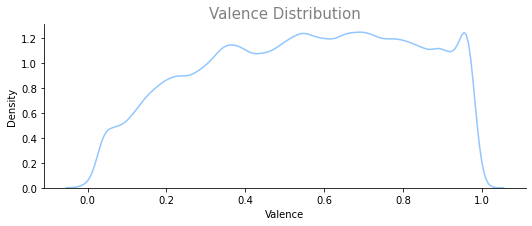

In [35]:
sns.displot(data=tracks, x='valence', kind='kde', height=3, aspect=2.5)

plt.title('Valence Distribution', fontsize=15, color='Gray')
plt.xlabel('Valence', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.show()

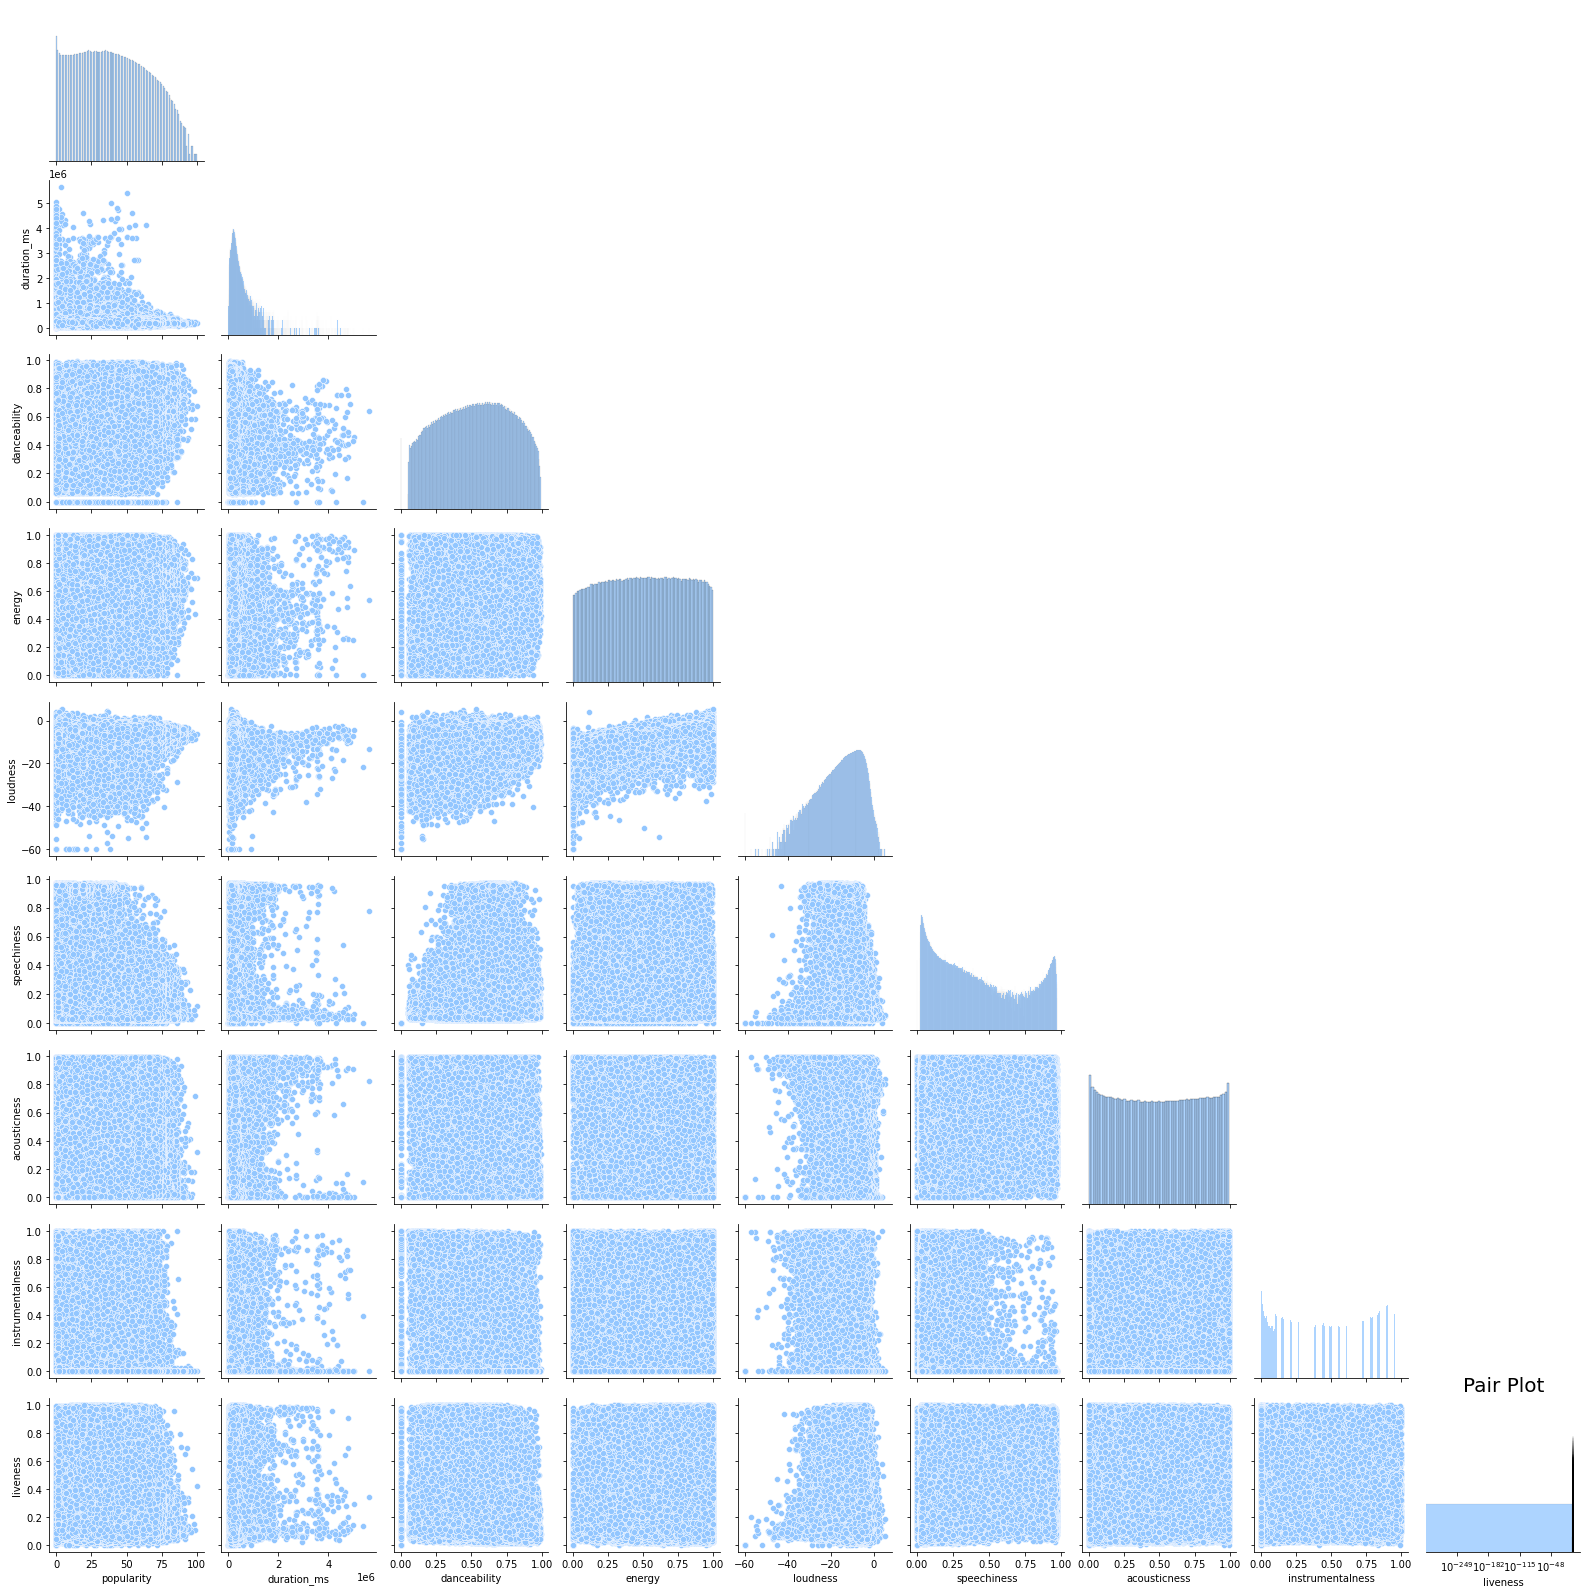

In [36]:
cols = ['popularity', 'duration_ms', 'danceability', 'energy', 'loudness', 'speechiness',
        'acousticness', 'instrumentalness', 'liveness']

sns.pairplot(tracks[cols], diag_kind='hist', corner=True)

plt.title('Pair Plot', fontsize=20)

plt.semilogx()
plt.semilogy()

plt.show()

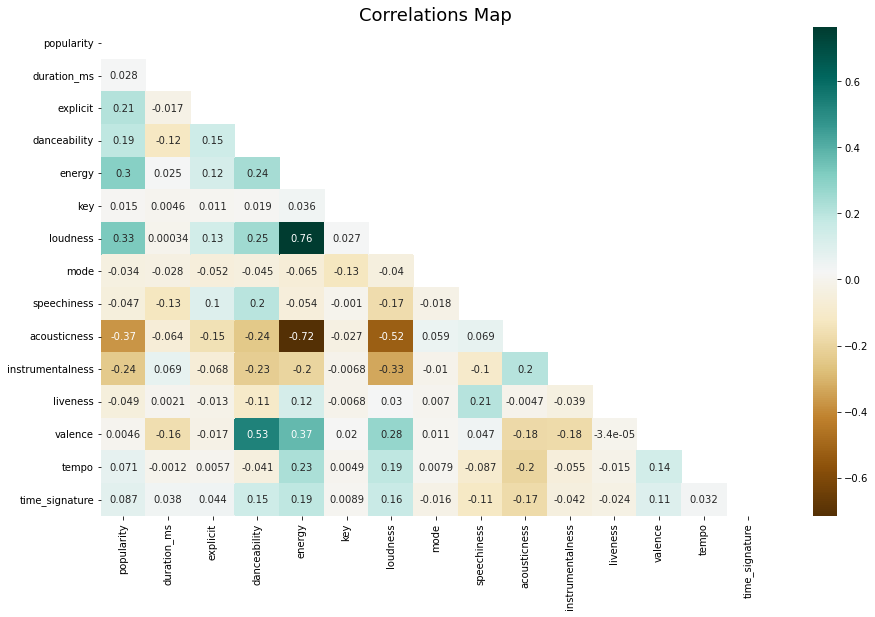

In [37]:
plt.figure(figsize=(15,9))

corr = tracks.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, annot=True, cmap='BrBG', mask=mask)

plt.title('Correlations Map', fontsize=18)
plt.show()

In [38]:
tracks[['release_date']].sample(10)

,release_date
204141,1971-03-30
363549,1984-08-20
467539,2004
179895,1958-01-01
62762,1989-01-01
579112,1984-04-01
124314,1950
364120,1987-08-26
399814,2019-11-29
12867,1938


In [39]:
tracks['release_date'].value_counts().head(10)

1998-01-01    2893
1997-01-01    2892
1995          2871
1997          2811
1996          2776
1990-01-01    2752
1998          2726
1996-01-01    2705
1994          2611
1995-01-01    2575
Name: release_date, dtype: int64

In [40]:
tracks['year'] = tracks['release_date'].astype(str).apply(lambda x: x[0:4])
tracks['year'].value_counts().head(10)

2020    13937
1998    12485
1999    12484
1997    12349
1996    12058
2019    11907
1995    11591
2014    11252
2016    11083
2018    10936
Name: year, dtype: int64

In [41]:
tracks.drop(['release_date'], axis=1, inplace=True)

In [42]:
tracks[['artists', 'id_artists']].sample(10)

,artists,id_artists
163230,['Scorpions'],['27T030eWyCQRmDyuvr1kxY']
6495,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2']
217628,['Nigga'],['4gaipGwvI72oJZVL2P0WJd']
87003,"['Pitbull', 'Ne-Yo']","['0TnOYISbd1XYRBk9myaseg', '21E3waRsmPlU7jZsS1..."
191408,['Fairuz'],['0dwFxqYkvZLSA6U6XfQcDV']
368875,['Gary Moore'],['23wr9RJZg0PmYvVFyNkQ4j']
555518,['Hibari Misora'],['1m5pMY5blqJwdxJ7vqQtuN']
45703,['David Bowie'],['0oSGxfWSnnOXhD2fKuz2Gy']
400444,['Oscar Levant'],['0cXLIzzlld2GM0hBiYWzdV']
351957,['Charles Tedeschi'],['0KJ5tCq0ORutxoMKTxhb2k']


In [43]:
# Extract artists into a list:
tracks['artists'] = tracks['artists'].apply(lambda x: re.findall(r"'([^']*)'", x))

# Count the number of artists:
tracks['num_artists'] = tracks['artists'].apply(lambda x: len(x))
tracks['num_artists'].value_counts()

1     475955
2      72969
3      20632
4       6663
0       4739
5       2511
6       1117
7        664
8        389
9        306
10       171
11       125
12        77
13        74
17        67
15        49
20        40
14        30
16        29
18        18
19        11
27         9
23         4
26         3
30         3
31         3
21         2
22         2
25         2
28         2
29         1
32         1
40         1
42         1
55         1
58         1
Name: num_artists, dtype: int64

In [44]:
tracks[tracks.num_artists.isin([0, 1, 2, 3])][['num_artists', 'name', 'artists']].sample(20)

,num_artists,name,artists
31152,2,"Partita No. 4 in D Major, BWV 828: VI. Menuet","[Johann Sebastian Bach, Glenn Gould]"
366476,1,Felek,[İbrahim Tatlıses]
39133,1,Ole Man Trouble - Mono; 2008 Remaster,[Otis Redding]
229799,2,Я тебе не верю,"[Grigory Leps, Irina Allegrova]"
448281,1,When the Moonlight Shines,[Mocca]
290718,1,Dopes To Infinity,[Monster Magnet]
453502,1,The Dark End of the Street,[Dan Penn]
5633,1,I Didn't Know Until You Told Me,[Louis Armstrong]
172974,1,Minne Katosivat Päivät,[Scandinavian Music Group]
476588,1,Qué Manera de Perder,[Ramón Aguilera]


Let's extract the first 3 artists for each song. 

In [45]:
# Explode artists column:
tracks['artist_1'] = tracks['artists'].apply(lambda x: x[0] if len(x) > 0 else 'no_artist')
tracks['artist_2'] = tracks['artists'].apply(lambda x: x[0] if len(x) > 1 else 'no_artist')
tracks['artist_3'] = tracks['artists'].apply(lambda x: x[0] if len(x) > 2 else 'no_artist')

tracks['id_artists'] = tracks['id_artists'].apply(lambda x: re.findall(r"'([^']*)'", x))
tracks['artist_1_id'] = tracks['id_artists'].apply(lambda x: x[0] if len(x) > 0 else 'no_artist_id')
tracks['artist_2_id'] = tracks['id_artists'].apply(lambda x: x[0] if len(x) > 1 else 'no_artist_id')
tracks['artist_3_id'] = tracks['id_artists'].apply(lambda x: x[0] if len(x) > 2 else 'no_artist_id')

In [46]:
tracks.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,danceability,energy,key,...,tempo,time_signature,year,num_artists,artist_1,artist_2,artist_3,artist_1_id,artist_2_id,artist_3_id
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,[Uli],[45tIt06XoI0Iio4LBEVpls],0.645,0.4450,0,...,104.851,3,1922,1,Uli,no_artist,no_artist,45tIt06XoI0Iio4LBEVpls,no_artist_id,no_artist_id
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,[Fernando Pessoa],[14jtPCOoNZwquk5wd9DxrY],0.695,0.2630,0,...,102.009,1,1922,1,Fernando Pessoa,no_artist,no_artist,14jtPCOoNZwquk5wd9DxrY,no_artist_id,no_artist_id
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,[Ignacio Corsini],[5LiOoJbxVSAMkBS2fUm3X2],0.434,0.1770,1,...,130.418,5,1922,1,Ignacio Corsini,no_artist,no_artist,5LiOoJbxVSAMkBS2fUm3X2,no_artist_id,no_artist_id
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,[Ignacio Corsini],[5LiOoJbxVSAMkBS2fUm3X2],0.321,0.0946,7,...,169.980,3,1922,1,Ignacio Corsini,no_artist,no_artist,5LiOoJbxVSAMkBS2fUm3X2,no_artist_id,no_artist_id
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,[Dick Haymes],[3BiJGZsyX9sJchTqcSA7Su],0.402,0.1580,3,...,103.220,4,1922,1,Dick Haymes,no_artist,no_artist,3BiJGZsyX9sJchTqcSA7Su,no_artist_id,no_artist_id


In [47]:
tracks.drop(['artists', 'id_artists'], axis=1, inplace=True)

In [48]:
tracks.query("""num_artists == 0""").sample(20)

,id,name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,...,tempo,time_signature,year,num_artists,artist_1,artist_2,artist_3,artist_1_id,artist_2_id,artist_3_id
560482,55JlyXw6KeFeVC9d9uCZ2K,Happiness,57,274027,0,0.603,0.748,9,-1.559,1,...,139.911,4,2015,0,no_artist,no_artist,no_artist,7zVOa12T0RhNRzpbwZ4OCt,no_artist_id,no_artist_id
570355,5L1EljLmM6GQWZzJUv713f,Binalig Scale: Mapalendad,0,118813,0,0.481,0.905,0,-8.770,1,...,104.318,4,1955,0,no_artist,no_artist,no_artist,3ip7bo003FbmoUucfx188F,no_artist_id,no_artist_id
118665,6XIeO5fwHiXrdxGpiu5i6y,Hong Kong,17,139480,0,0.643,0.511,5,-8.851,0,...,148.688,3,1958,0,no_artist,no_artist,no_artist,3VBpsrUi2vV7Uj87ONHu7Z,no_artist_id,no_artist_id
207185,5Yg2sDUtVz7WNcl5LLzWIy,Lejanías,32,211440,0,0.603,0.444,7,-11.712,1,...,134.058,3,1993,0,no_artist,no_artist,no_artist,6yVxbzScbih8Uvyfrdhx17,no_artist_id,no_artist_id
143974,7nabjegyfwRCiFX11anzb1,Para Chango,24,215214,0,0.764,0.633,2,-9.050,0,...,92.682,4,1976,0,no_artist,no_artist,no_artist,1c84wItoiAe1pEbpJMqUmQ,no_artist_id,no_artist_id
46736,1kX0JVbq1lG9VZNiLF3Bwz,Get Down,50,159867,0,0.770,0.888,1,-6.564,1,...,124.659,4,1973,0,no_artist,no_artist,no_artist,4HVmeVTQBgvTuvjB1JYwaf,no_artist_id,no_artist_id
447707,0Orql9N7pR0q9iWwzvWsPv,flower,27,296400,0,0.388,0.882,7,-5.667,1,...,172.267,4,1996,0,no_artist,no_artist,no_artist,6jTjjAjvYvMYfaqi837p5x,no_artist_id,no_artist_id
560233,6n1iYH6HIbqf4lvMgwJYqj,MR.TAXI,46,213213,0,0.821,0.929,10,-3.512,0,...,121.996,4,2014,0,no_artist,no_artist,no_artist,0Sadg1vgvaPqGTOjxu0N6c,no_artist_id,no_artist_id
443407,1jdAlTLjqbp5wyHH79WP05,AKA... What A Life!,51,264467,0,0.449,0.941,6,-3.279,0,...,119.018,4,2011,0,no_artist,no_artist,no_artist,7sjttK1WcZeyLPn3IsQ62L,no_artist_id,no_artist_id
401125,03oNlIl3p0UohUvo467fcH,My Happiness Day - Stereo,18,188013,0,0.771,0.189,9,-16.842,1,...,123.250,4,1968,0,no_artist,no_artist,no_artist,55WCM9xjaVzZYf6o4lUrwH,no_artist_id,no_artist_id


In [49]:
# Let's remove tracks without any artist associated:
tracks = tracks.query("""num_artists > 0""")

In [50]:
artists['genres'].sample(20)

643404                                                    []
184226                                      ['rap algerien']
1035316                                       ['dub reggae']
430039                                                    []
735509                                                    []
413387                                                    []
185900                                                    []
728879                                                    []
1099673                                                   []
329852                                                    []
271685                                                    []
179076                                                    []
685602                                                    []
149242                                                    []
143708     ['dance pop', 'disco house', 'dutch house', 'e...
1075780                                                   []
466116                  

In [51]:
# Transform 'genres' column into a list of genres:
artists['genres'] = artists['genres'].apply(lambda x: [re.sub(' ','_',i) for i in re.findall(r"'([^']*)'", x)])
artists['genres'].sample(15)

1054768                                     []
545540                                      []
945301                                      []
455511                                      []
1829                                        []
1108082                                     []
101857                                      []
876421                                      []
812117                                      []
645317                                      []
22554                                       []
652422     [eletronica_underground_brasileira]
718605                                      []
1058771                                     []
959823                                      []
Name: genres, dtype: object

In [52]:
artists['num_genres'] = artists['genres'].apply(lambda x: len(x)).astype(int)
artists['num_genres'].value_counts()

0     857218
1     218848
2      50817
3      17424
4       7905
5       4195
6       2361
7       1361
8        816
9        501
10       281
11       149
12        88
13        44
14        38
15        26
16        13
17         6
18         2
19         1
21         1
Name: num_genres, dtype: int64

In [53]:
# Checking artists without genre and with 1 or 2 genres:
display(artists.query("""num_genres in (0, 1, 2)""")[['num_genres', 'genres']].sample(20))

,num_genres,genres
144127,2,"[polish_hip_hop, polish_trap]"
283025,1,[ambeat]
1037231,0,[]
778800,0,[]
200442,2,"[swedish_hip_hop, swedish_trap_pop]"
467905,0,[]
246176,1,[musica_de_fondo]
211675,1,[deep_surf_music]
204381,1,[cantopop]
401451,0,[]


In [54]:
# Explode genres column:
artists['genre_1'] = artists['genres'].apply(lambda x: x[0] if len(x) > 0 else 'no_genre')
artists['genre_2'] = artists['genres'].apply(lambda x: x[1] if len(x) > 1 else 'no_genre')
artists['genre_3'] = artists['genres'].apply(lambda x: x[2] if len(x) > 2 else 'no_genre')

artists.sample(10)

,id,followers,genres,name,popularity,num_genres,genre_1,genre_2,genre_3
89928,5g9wcf5TyEGko6gqtx1xMi,42.0,[],Irma Kolassi,4,0,no_genre,no_genre,no_genre
794438,7Dw48dmSAut1GhOdfjEXWj,50.0,[],Eduardo Bennato,0,0,no_genre,no_genre,no_genre
17847,6Iv6qNsj0vNDh5siv9Z4CX,4.0,[],Kake,2,0,no_genre,no_genre,no_genre
896859,47Rq0L0bBdIPZ7yhVCrzjN,19.0,[egyptian_traditional],Hijazi Metkal,0,1,egyptian_traditional,no_genre,no_genre
1127912,2YHnpIbH3oPO3Wzqno5DIT,82.0,"[dutch_pop, dutch_rock]",Shane Shu,2,2,dutch_pop,dutch_rock,no_genre
877872,3ZmBRFHQ5lF4k7Ly7qvuEg,37.0,[],Toby Amos,3,0,no_genre,no_genre,no_genre
853539,2g8mUNOx44gUxvJ2TzqtbD,362.0,[],Mic Handz,11,0,no_genre,no_genre,no_genre
832110,3SkNSbEsu8ZPhIPaGhBYZi,27.0,[],EP Productions,0,0,no_genre,no_genre,no_genre
540967,05FBTvRJk6pQhBpb4ohOB7,43.0,[],Glen Galaxy,0,0,no_genre,no_genre,no_genre
1004791,0cbFEiIGNU5aEYOZj62lYP,61.0,[],Due South,0,0,no_genre,no_genre,no_genre


In [55]:
artists.drop(['genres'], axis=1, inplace=True)

In [56]:
len(tracks)

581933

In [57]:
# Merge dataframes:
spotify_tracks = pd.merge(
    left=tracks, 
    right=artists[['id', 'name', 'popularity', 'followers', 'num_genres', 'genre_1', 'genre_2', 'genre_3']].add_prefix('artist_1_'),
    how='left',
    left_on='artist_1_id', 
    right_on='artist_1_id'
)

spotify_tracks = pd.merge(
    left=spotify_tracks,
    right=artists[['id', 'name', 'popularity', 'followers', 'num_genres', 'genre_1', 'genre_2', 'genre_3']].add_prefix('artist_2_'),
    how='left',
    left_on='artist_2_id', 
    right_on='artist_2_id'
)

spotify_tracks = pd.merge(
    left=spotify_tracks,
    right=artists[['id', 'name', 'popularity', 'followers', 'num_genres', 'genre_1', 'genre_2', 'genre_3']].add_prefix('artist_3_'),
    how='left',
    left_on='artist_3_id', 
    right_on='artist_3_id'
)

print(len(tracks) == len(spotify_tracks))

spotify_tracks.sample(10)

True


,id,name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,...,artist_2_genre_1,artist_2_genre_2,artist_2_genre_3,artist_3_name,artist_3_popularity,artist_3_followers,artist_3_num_genres,artist_3_genre_1,artist_3_genre_2,artist_3_genre_3
358952,7K3BmWTMTnd0jSIjQ64T26,Libertango (Piano),17,121892,0,0.248,0.108,9,-24.868,0,...,bandoneon,latin_classical,nuevo_tango,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115218,56I9f0fNAu7mZIVqlHRYZZ,Prisoner of Love,1,166933,0,0.711,0.148,10,-16.019,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61529,2BK4Vuf2WpjgiKMtLMb4U7,You Don't Have To Say You Love Me,48,168600,0,0.302,0.439,2,-10.465,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48277,7uPmQttafLiJyju14JREY4,Young Americans - 2016 Remaster,61,313707,0,0.614,0.763,4,-8.949,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
580787,2tynpbqLrGAJfROkalzYKl,Speakin' My Piece - Remastered,4,364680,0,0.595,0.434,2,-10.937,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13583,4tWU81nOaLEr9XM5IhDkVy,Șapte săptămâni din post,1,180114,0,0.425,0.291,9,-9.389,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
235276,5GSoHvGXtPmpqKE4CI7ixi,Detrás De La Puerta,26,179747,0,0.620,0.545,10,-6.056,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
273590,4ARcfREq6OpIVfVImAPFpc,真夜中のオーケストラ,52,353920,0,0.453,0.915,0,-4.054,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263241,3fv9VlWc8BJEO01lM7kOQC,Ghunghat Men Sharmaye Dulhaniya,0,179221,0,0.432,0.582,8,-8.294,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2587,4o9EBaaw90BN3AbYo9jf7B,Kapitel 101 - Der Page und die Herzogin,1,116520,0,0.627,0.167,9,-22.789,0,...,no_genre,no_genre,no_genre,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
spotify_tracks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 581933 entries, 0 to 581932
Data columns (total 46 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   581933 non-null  object 
 1   name                 581862 non-null  object 
 2   popularity           581933 non-null  int64  
 3   duration_ms          581933 non-null  int64  
 4   explicit             581933 non-null  int64  
 5   danceability         581933 non-null  float64
 6   energy               581933 non-null  float64
 7   key                  581933 non-null  int64  
 8   loudness             581933 non-null  float64
 9   mode                 581933 non-null  int64  
 10  speechiness          581933 non-null  float64
 11  acousticness         581933 non-null  float64
 12  instrumentalness     581933 non-null  float64
 13  liveness             581933 non-null  float64
 14  valence              581933 non-null  float64
 15  tempo            

In [59]:
# Drop unnecessary columns:
spotify_tracks.drop(['artist_1_id', 'artist_2_id', 'artist_3_id', 'id'], axis=1, inplace=True)

In [60]:
spotify_tracks.isnull().sum()

name                       71
popularity                  0
duration_ms                 0
explicit                    0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
time_signature              0
year                        0
num_artists                 0
artist_1                    0
artist_2                    0
artist_3                    0
artist_1_name           11760
artist_1_popularity     11760
artist_1_followers      11761
artist_1_num_genres     11760
artist_1_genre_1        11760
artist_1_genre_2        11760
artist_1_genre_3        11760
artist_2_name          477159
artist_2_popularity    477159
artist_2_followers     477160
artist_2_num_genres    477159
artist_2_genre_1       477159
artist_2_g

In [61]:
spotify_tracks.query("""name.isnull()""", engine='python')[['name', 'artist_1', 'artist_2', 'artist_3', 'popularity', 'year']]

,name,artist_1,artist_2,artist_3,popularity,year
224304,NaN,,no_artist,no_artist,28,1994
506611,NaN,,no_artist,no_artist,0,1922
506612,NaN,,no_artist,no_artist,0,1922
506614,NaN,,no_artist,no_artist,0,1922
506615,NaN,,no_artist,no_artist,0,1922
...,...,...,...,...,...,...
512842,NaN,,no_artist,no_artist,2,1962
512851,NaN,,no_artist,no_artist,2,1962
515761,NaN,,no_artist,no_artist,6,1974
520868,NaN,,no_artist,no_artist,26,1998


In [62]:
spotify_tracks.query("""artist_1 == ''""")[['name', 'artist_1', 'artist_1_popularity', 'artist_2', 'artist_3', 'popularity', 'year']]

,name,artist_1,artist_1_popularity,artist_2,artist_3,popularity,year
4544,Blue Coat Blues - Remastered,,0.0,,no_artist,0,1928
4737,J.C. Johnson's Blues - Remastered,,0.0,,no_artist,0,1928
224304,NaN,,NaN,no_artist,no_artist,28,1994
374888,Au son calme des tam-tams (Thème Principal),,26.0,,no_artist,37,1995
393380,Mago Merlino,,20.0,,no_artist,31,2004
...,...,...,...,...,...,...,...
512842,NaN,,NaN,no_artist,no_artist,2,1962
512851,NaN,,NaN,no_artist,no_artist,2,1962
515761,NaN,,NaN,no_artist,no_artist,6,1974
520868,NaN,,NaN,no_artist,no_artist,26,1998


In [63]:
spotify_tracks.query("""num_artists == 0""").sum().sum()

0.0

In [64]:
# let's remove tracks without title and artists with no name associated:
spotify_tracks = spotify_tracks[spotify_tracks['name'].notnull()]
spotify_tracks = spotify_tracks[spotify_tracks['artist_1'] != '']

display(spotify_tracks.query("""name.isnull()""", engine='python').sum().sum())
display(spotify_tracks.query("""artist_1 == ''""")[['name', 'artist_1', 'artist_1_popularity', 'artist_2', 'artist_3', 'popularity', 'year']])

0.0

,name,artist_1,artist_1_popularity,artist_2,artist_3,popularity,year


In [65]:
# There are no more artists without a name associated:
spotify_tracks.query("""artist_2 == '' or artist_3 == ''""")

,name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,...,artist_2_genre_1,artist_2_genre_2,artist_2_genre_3,artist_3_name,artist_3_popularity,artist_3_followers,artist_3_num_genres,artist_3_genre_1,artist_3_genre_2,artist_3_genre_3


In [66]:
artists.query("""num_genres == 0""")

,id,followers,name,popularity,num_genres,genre_1,genre_2,genre_3
0,0DheY5irMjBUeLybbCUEZ2,0.0,Armid & Amir Zare Pashai feat. Sara Rouzbehani,0,0,no_genre,no_genre,no_genre
1,0DlhY15l3wsrnlfGio2bjU,5.0,ปูนา ภาวิณี,0,0,no_genre,no_genre,no_genre
2,0DmRESX2JknGPQyO15yxg7,0.0,Sadaa,0,0,no_genre,no_genre,no_genre
3,0DmhnbHjm1qw6NCYPeZNgJ,0.0,Tra'gruda,0,0,no_genre,no_genre,no_genre
4,0Dn11fWM7vHQ3rinvWEl4E,2.0,Ioannis Panoutsopoulos,0,0,no_genre,no_genre,no_genre
...,...,...,...,...,...,...,...,...
1162078,1Zk80PnqV7uoc8vMzpX9nZ,13.0,Rapunzel and Sedayne,0,0,no_genre,no_genre,no_genre
1162079,5qmon2ceyHHvbFYzFBCo9J,26.0,Jenny McCormick,0,0,no_genre,no_genre,no_genre
1162089,2AuW39AOSXtNdQP6thlLgi,188.0,Ty Barnett,3,0,no_genre,no_genre,no_genre
1162091,6LogY6VMM3jgAE6fPzXeMl,46.0,Rodney Laney,2,0,no_genre,no_genre,no_genre


In [67]:
# Delete no longer needed datasets:
del tracks
del artists

## 2. Feature Engineering

- Create new variables;
- Normalize float variables;
- One-hot encoding of year and popularity variables;
- Create TF-IDF features off of artist genres. 

In [ ]:
#tracks['more_than_3_artists'] = np.where(tracks['num_artists'] > 3, 1, 0)
#tracks['is_duet'] = np.where(tracks['num_artists'] == 2, 1, 0)

In [ ]:
# average popularity
# average followers
# average num of genres (divide by number of artists??)

In [ ]:
# Drop tracks without artist associated??